In [ ]:
!pip install pandas numpy nltk gensim pyLDAvis


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving all_platforms_combined.csv to all_platforms_combined (1).csv


In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.23.5


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is i

In [ ]:
!pip install gensim pyLDAvis


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import pandas as pd

# Reload your dataset
df = pd.read_csv("all_platforms_combined.csv")
df.head()


,platform,keyword,username,content,likes,comments,reposts,engagement,text_length
0,LinkedIn,ai therapy,"Cole Butler, LPCC, ADDC, MACP",This most recent edition of AI therapy explore...,3,2,0,5,70
1,LinkedIn,ai therapy,Pierre Côté CPS-P,This article explores my development of DrElli...,8,12,0,20,94
2,LinkedIn,ai therapy,Claire Farwell,AI passed the Turing Test\nTherapy bots now ri...,51,21,0,72,127
3,LinkedIn,ai therapy,"Paul Bittner, M.Ed, LPCC-S, MBA",💡 AI in Therapy: Threat or Tool?\nAs mental he...,4,1,0,5,181
4,LinkedIn,ai therapy,Jeff Robinson,AI is not just automating creativity—it is exp...,7,6,0,13,34


In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # <-- for lemmatizer context


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# STEP 3: Preprocessing Setup
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # for lemmatizer context

# Setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess(text):
    if pd.isnull(text):
        return []
    tokens = text.lower().split()  # basic tokenization
    tokens = [word for word in tokens if word.isalpha()]  # remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # lemmatize
    return tokens

# Apply to your dataset
df['tokens'] = df['content'].apply(preprocess)

# Preview
df[['content', 'tokens']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,content,tokens
0,This most recent edition of AI therapy explore...,"[recent, edition, ai, therapy, explores, recen..."
1,This article explores my development of DrElli...,"[article, explores, development, ai, therapy, ..."
2,AI passed the Turing Test\nTherapy bots now ri...,"[ai, passed, turing, test, therapy, bot, rival..."
3,💡 AI in Therapy: Threat or Tool?\nAs mental he...,"[ai, threat, mental, health, standing, one, re..."
4,AI is not just automating creativity—it is exp...,"[ai, automating, expanding, reshapes, mental, ..."


In [ ]:
# Create a new DataFrame excluding AI therapy
lda_df = df[df['keyword'] != 'ai therapy'].copy()

# If you already created 'tokens' before filtering, just copy them over
lda_df['tokens'] = lda_df['tokens']


In [ ]:
from gensim import corpora

# Use only the filtered content
dictionary = corpora.Dictionary(lda_df['tokens'])
corpus = [dictionary.doc2bow(text) for text in lda_df['tokens']]

print(f"Number of unique tokens: {len(dictionary)}")
print(f"Number of documents: {len(corpus)}")


Number of unique tokens: 7352
Number of documents: 629


In [ ]:
from gensim.models import LdaModel

# Train LDA model
lda_model = LdaModel(
    corpus=[dictionary.doc2bow(text) for text in lda_df['tokens']],
    id2word=dictionary,
    num_topics=3,       # You can change this to 4, 5, etc. for more topics
    random_state=42,
    passes=10,
    alpha='auto',
    per_word_topics=True
)


In [ ]:
# Display the discovered topics
for idx, topic in lda_model.print_topics(-1):
    print(f"\n🧠 Topic {idx + 1}:")
    print(topic)



🧠 Topic 1:
0.013*"health" + 0.012*"mental" + 0.006*"time" + 0.005*"like" + 0.005*"need" + 0.005*"depression" + 0.004*"one" + 0.004*"work" + 0.004*"even" + 0.003*"burnout"

🧠 Topic 2:
0.006*"one" + 0.006*"people" + 0.005*"like" + 0.005*"mental" + 0.005*"need" + 0.005*"make" + 0.005*"feel" + 0.004*"health" + 0.004*"help" + 0.004*"know"

🧠 Topic 3:
0.010*"mental" + 0.009*"health" + 0.008*"like" + 0.007*"people" + 0.006*"one" + 0.005*"time" + 0.005*"get" + 0.005*"work" + 0.005*"feel" + 0.005*"life"


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare the visualization
pyLDAvis.enable_notebook()

# Use the same dictionary and corpus you trained on
corpus = [dictionary.doc2bow(text) for text in lda_df['tokens']]
vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Display
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.032916  0.053158       1        1  37.944131
1     -0.042665 -0.048775       2        1  33.285081
0      0.075581 -0.004383       3        1  28.770788, topic_info=           Term        Freq       Total Category  logprob  loglift
395      health  321.000000  321.000000  Default  30.0000  30.0000
748      stress   54.000000   54.000000  Default  29.0000  29.0000
406      mental  327.000000  327.000000  Default  28.0000  28.0000
296      growth   33.000000   33.000000  Default  27.0000  27.0000
276        data   32.000000   32.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
148        take   25.523179  115.163516   Topic3  -6.0514  -0.2610
1371       year   22.277819   83.821804   Topic3  -6.1874  -0.0793
233   something   20.699821   78.124309   Topic3  -6.2609  -0.0824
197         get   22.846126  143.468469   Topic3  -6.1622  -0.5915
403        life   22.083054  126.505943   Topic3  -6.1962  -0.4997

[275 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
445       1  0.038952  across
445       2  0.545334  across
445       3  0.428477  across
4302      1  0.904516   ahmad
4302      3  0.090452   ahmad
...     ...       ...     ...
5913      1  0.837655  𝑴𝑬𝑵𝑻𝑨𝑳
2365      1  0.939385      𝒊𝒕
2368      1  0.837485     𝒕𝒉𝒆
2467      2  0.846866     𝗧𝗵𝗲
1894      2  0.949192     𝘆𝗼𝘂

[424 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [ ]:
# Step A1: Define words to exclude
excluded_keywords = {'mental', 'health', 'burnout', 'depression', 'depress', 'therapy', 'ai'}

# Step A2: Create a copy of tokens with those keywords removed
lda_df['filtered_tokens'] = lda_df['tokens'].apply(
    lambda tokens: [word for word in tokens if word not in excluded_keywords]
)


In [ ]:
from gensim import corpora

filtered_dictionary = corpora.Dictionary(lda_df['filtered_tokens'])
filtered_corpus = [filtered_dictionary.doc2bow(text) for text in lda_df['filtered_tokens']]


In [ ]:
from gensim.models import LdaModel

filtered_lda_model = LdaModel(
    corpus=filtered_corpus,
    id2word=filtered_dictionary,
    num_topics=3,       # or 4–5 if you want more detailed themes
    random_state=42,
    passes=10,
    alpha='auto',
    per_word_topics=True
)


In [ ]:
for idx, topic in filtered_lda_model.print_topics(-1):
    print(f"\n🧠 Topic {idx + 1}:")
    print(topic)



🧠 Topic 1:
0.006*"one" + 0.006*"like" + 0.006*"people" + 0.005*"need" + 0.004*"time" + 0.004*"feel" + 0.004*"make" + 0.004*"even" + 0.004*"know" + 0.004*"get"

🧠 Topic 2:
0.007*"like" + 0.006*"time" + 0.006*"people" + 0.006*"work" + 0.006*"one" + 0.005*"need" + 0.004*"get" + 0.004*"life" + 0.004*"take" + 0.004*"feel"

🧠 Topic 3:
0.005*"like" + 0.005*"one" + 0.005*"make" + 0.005*"feel" + 0.004*"work" + 0.004*"need" + 0.004*"people" + 0.003*"get" + 0.003*"see" + 0.003*"life"


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis_filtered = gensimvis.prepare(filtered_lda_model, filtered_corpus, filtered_dictionary)
vis_filtered  # or pyLDAvis.display(vis_filtered)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.009769 -0.063336       1        1  40.084046
0     -0.055659  0.039332       2        1  38.177635
2      0.065427  0.024004       3        1  21.738319, topic_info=          Term       Freq       Total Category  logprob  loglift
1779  wellness  19.000000   19.000000  Default  30.0000  30.0000
343      skill  24.000000   24.000000  Default  29.0000  29.0000
3790   vitamin  17.000000   17.000000  Default  28.0000  28.0000
4296     ahmad   9.000000    9.000000  Default  27.0000  27.0000
2159     woman  25.000000   25.000000  Default  26.0000  26.0000
...        ...        ...         ...      ...      ...      ...
1       better  14.409633   50.374466   Topic3  -6.3118   0.2745
197         go  16.138327   80.110032   Topic3  -6.1985  -0.0761
178        day  16.750501   94.671962   Topic3  -6.1613  -0.2059
77        help  17.326093  120.366604   Topic3  -6.1275  -0.4122
239      thing  15.651226   93.124124   Topic3  -6.2291  -0.2573

[272 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6798      3  0.975207  abortion
2925      2  0.840176   african
4296      3  0.914031     ahmad
6880      1  0.952675       aku
367       1  0.341779      also
...     ...       ...       ...
6335      1  0.974071     파트너님의
5904      3  0.975127    𝑯𝑬𝑨𝑳𝑻𝑯
5907      3  0.937942    𝑴𝑬𝑵𝑻𝑨𝑳
2362      1  0.833841       𝒕𝒉𝒆
2465      3  0.783394        𝗶𝘀

[410 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [ ]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Load your full combined dataset
df = pd.read_csv("all_platforms_combined.csv")

# Filter for 'ai therapy' posts only
ai_df = df[df['keyword'] == 'ai therapy'].copy()


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize it
analyzer = SentimentIntensityAnalyzer()


In [ ]:
# Apply VADER sentiment scoring
ai_df['vader_score'] = ai_df['content'].astype(str).apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Convert scores to labels
def label_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

ai_df['vader_sentiment'] = ai_df['vader_score'].apply(label_sentiment)


<ipython-input-60-84344e8ce99d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ai_df, x='vader_sentiment', order=['positive', 'neutral', 'negative'], palette='pastel')
<ipython-input-60-84344e8ce99d>:9: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


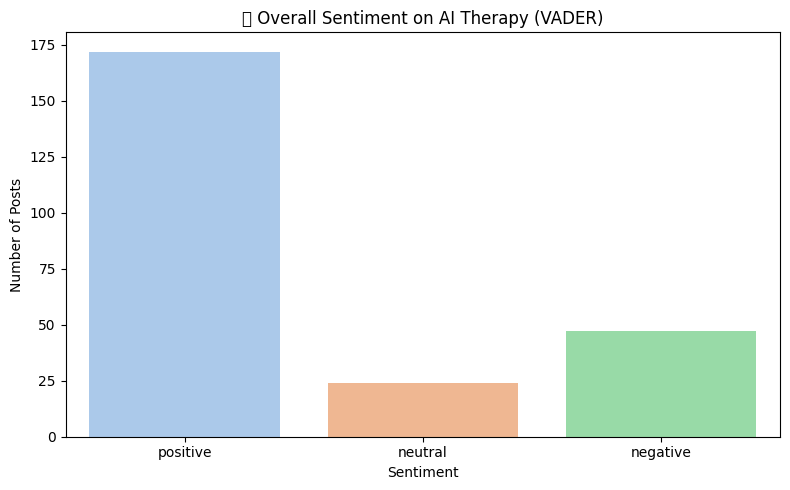

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=ai_df, x='vader_sentiment', order=['positive', 'neutral', 'negative'], palette='pastel')
plt.title("💬 Overall Sentiment on AI Therapy (VADER)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


<ipython-input-61-d6b2ea9248ed>:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


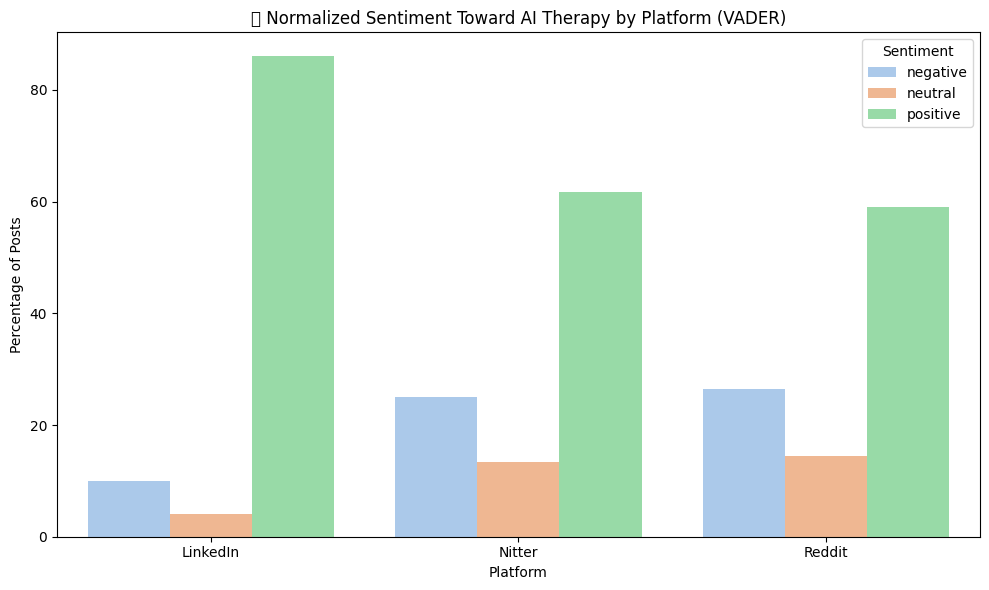

In [ ]:
# Count sentiment by platform
sent_counts = ai_df.groupby(['platform', 'vader_sentiment']).size().reset_index(name='count')

# Normalize per platform
total = sent_counts.groupby('platform')['count'].transform('sum')
sent_counts['percentage'] = 100 * sent_counts['count'] / total

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=sent_counts, x='platform', y='percentage', hue='vader_sentiment', palette='pastel')
plt.title("📊 Normalized Sentiment Toward AI Therapy by Platform (VADER)")
plt.ylabel("Percentage of Posts")
plt.xlabel("Platform")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


In [ ]:
# Raw counts before normalization
ai_df['platform'] = ai_df['platform'].astype(str)  # just in case
ai_df['vader_sentiment'] = ai_df['vader_sentiment'].astype(str)

raw_counts = ai_df.groupby(['platform', 'vader_sentiment']).size().unstack(fill_value=0)
raw_counts['total'] = raw_counts.sum(axis=1)
raw_counts


vader_sentiment,negative,neutral,positive,total
platform,,,,
LinkedIn,10,4,86,100
Nitter,15,8,37,60
Reddit,22,12,49,83


In [ ]:
# Top 5 most positive posts (highest VADER compound score)
most_positive_vader = ai_df.sort_values(by='vader_score', ascending=False).head(5)
most_positive_vader[['platform', 'content', 'vader_score']]

,platform,content,vader_score
49,LinkedIn,From an interesting line from Bill Gates conve...,0.9987
93,LinkedIn,Great post! Bill Gates’ prediction about AI re...,0.9978
94,LinkedIn,How Artificial Intelligence (AI) is Transformi...,0.9963
21,LinkedIn,🤖 𝑰𝑺 𝑨𝑰 𝑴𝑨𝑲𝑰𝑵𝑮 𝑳𝑰𝑭𝑬 𝑴𝑶𝑹𝑬 𝑯𝑼𝑴𝑨𝑵? 𝑻𝑯𝑬 𝑺𝑪𝑰𝑬𝑵𝑪𝑬 𝑩𝑬...,0.9955
53,LinkedIn,🎮 What Games Can Teach Us About Ourselves (Tha...,0.9941
